## 4. K-Nearest Neighbours

We explored a K-Nearest Neighbours (KNN) model to predict CPI values using each factor. KNN is a supervised machine learning algorithm that can be used in both classification and regression scenarios. For our problem statement, we will be using KNN in a regression context as we are seeking to predict the numerical value of CPI using each factor. We decided to explore a KNN model as we are analysing the accuracy of an individual factor in predicting CPI values. Due to the direct relationship between each factor and CPI, KNN is a suitable model to use because of its simplicity and ease of interpretation.

In [ ]:
# Import essential libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sb

# Import K-Nearest Neighbors libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [ ]:
# Import CPI data for comparison
cpi_data_clean = pd.read_csv('cleaned_cpi.csv')

### Create function to run K-Nearest Neighbors algorithm

The function below will generate a KNN model for a specific variable and assess its accuracy in predicting CPI values. Its parameters include cleaned datasets for both predictor and CPI data, along with the number of nearest neighbors to be used in generating the model.  
  
  The function will generate a model and train it on the train dataset (80% of data points) before testing that model on a test dataset (remaining 20% of data points). The accuracy of each model is determined by its coefficient of determination score which will be generated for comparison in the later part of the analysis.

In [ ]:
def knn_algorithm(pred_data_clean,cpi_data_clean, neighbor, xaxis):

    # Merge predictor and CPI datasets to find values within a common time period
    pred_cpi = pd.merge(pred_data_clean, cpi_data_clean, how='inner',on='Date')

    # Execute 80/20 train-test split 
    pred_train, pred_test, cpi_train, cpi_test = train_test_split(pred_cpi[['Value_x']],pred_cpi[['Value_y']],test_size=0.2)

    # Create regressor object
    pred_reg = KNeighborsRegressor(n_neighbors=neighbor)
    pred_reg.fit(pred_train,cpi_train)

    # Visualise prediction on train dataset 
    cpi_train_pred = pred_reg.predict(pred_train)

    f,axes = plt.subplots(1,1,figsize=(16,8))
    plt.scatter(pred_train, cpi_train, color='green')
    plt.scatter(pred_train, cpi_train_pred, color='red')
    plt.title("K-Nearest Neighbors on Train Set")
    plt.xlabel(str(xaxis))
    plt.ylabel("CPI Value")
    plt.show()

    # Visualise prediction on test dataset
    cpi_test_pred = pred_reg.predict(pred_test)

    f,axes = plt.subplots(1,1,figsize=(16,8))
    plt.scatter(pred_test, cpi_test, color='green')
    plt.scatter(pred_test, cpi_test_pred, color='red')
    plt.title("K-Nearest Neighbors on Test Set")
    plt.xlabel(str(xaxis))
    plt.ylabel("CPI Value")
    plt.show()

    # Explained variance values for train and test set
    print("Coefficient of Determination on train set: ", round(pred_reg.score(pred_train,cpi_train),3))
    print("Coefficient of Determination on test set: ", round(pred_reg.score(pred_test,cpi_test),3))

    return round(pred_reg.score(pred_test,cpi_test),3)





### Number of Neighbors
The accuracy of a K-Nearest Neighbors algorithm depends largely on the K value selected. If we select a K value of 1, each point in the training set has a significant influence on its adjacent points. On the other hand, selecting a K value which is too large may provide smoother predictions but will compromise on the goodness of fit on the overall dataset.

In [ ]:
# Create a function to test the goodness of fit while varying K value
def knn_test(pred_data_clean,cpi_data_clean, neighbor):

    # Merge predictor and CPI datasets to find values within a common time period
    pred_cpi = pd.merge(pred_data_clean, cpi_data_clean, how='inner',on='Date')

    # Execute 80/20 train-test split 
    pred_train, pred_test, cpi_train, cpi_test = train_test_split(pred_cpi[['Value_x']],pred_cpi[['Value_y']],test_size=0.2)

    # Create regressor object
    pred_reg = KNeighborsRegressor(n_neighbors=neighbor)
    pred_reg.fit(pred_train,cpi_train)

    # Explained variance values for train and test set
    print("Coefficient of Determination on train set: ", round(pred_reg.score(pred_train,cpi_train),3))
    print("Coefficient of Determination on test set: ", round(pred_reg.score(pred_test,cpi_test),3))

    return round(pred_reg.score(pred_test,cpi_test),3)


In [ ]:
# Test KNN model on NEER data to determine optimal K value

pred_data_clean = pd.read_csv('cleaned_neer.csv')

for k in range(1,10):
    print("Accuracy when K=",k)
    k_score = knn_test(pred_data_clean,cpi_data_clean, k)
    print()

Accuracy when K= 1
Coefficient of Determination on train set:  0.959
Coefficient of Determination on test set:  -0.451

Accuracy when K= 2
Coefficient of Determination on train set:  0.644
Coefficient of Determination on test set:  0.04

Accuracy when K= 3
Coefficient of Determination on train set:  0.531
Coefficient of Determination on test set:  0.014

Accuracy when K= 4
Coefficient of Determination on train set:  0.553
Coefficient of Determination on test set:  0.028

Accuracy when K= 5
Coefficient of Determination on train set:  0.472
Coefficient of Determination on test set:  0.21

Accuracy when K= 6
Coefficient of Determination on train set:  0.481
Coefficient of Determination on test set:  0.088

Accuracy when K= 7
Coefficient of Determination on train set:  0.445
Coefficient of Determination on test set:  0.188

Accuracy when K= 8
Coefficient of Determination on train set:  0.444
Coefficient of Determination on test set:  0.211

Accuracy when K= 9
Coefficient of Determination o

After running the above test code multiple times, we found that a K value of 5 is most likely to provide the best fit on our dataset. As such, we have decided to use a K value of 5 in our subsequent K-Nearest Neighbors analysis for our selected factors.

After we have determined the optimal K value to be used for our KNN model, we will train a KNN model for each variable on a train dataset. Following which, we will test our model on a test dataset for each variable and the results will be used to assess the accuracy of each model in predicting CPI values.

### KNN Model on inflation expectations data

In [ ]:
# Import predictor dataset
bie_data_clean = pd.read_csv('cleaned_bie.csv')

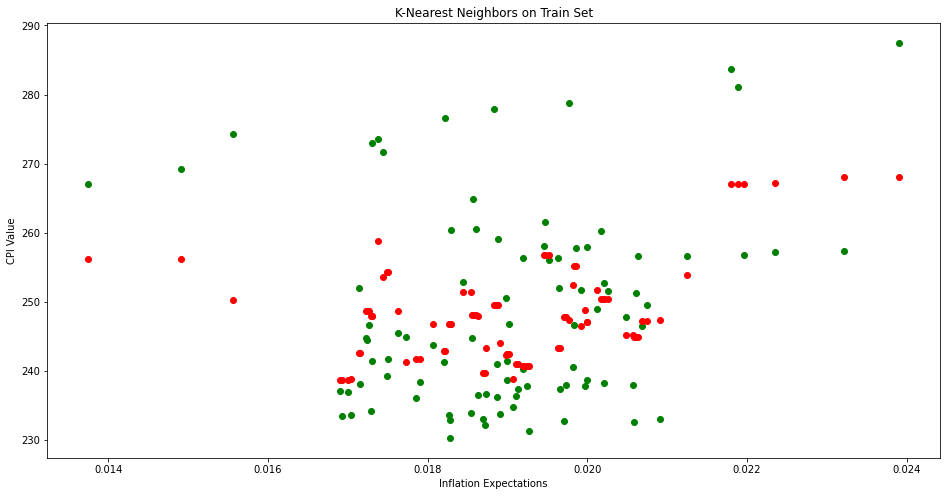

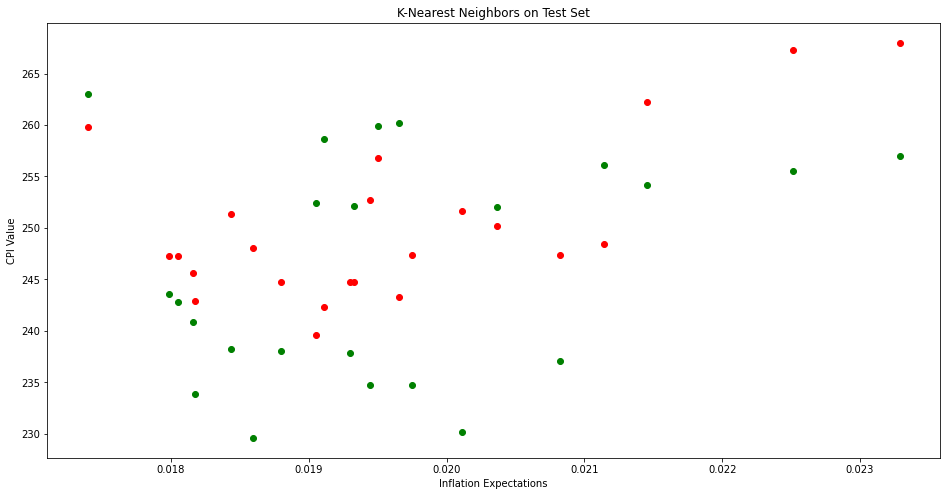

Coefficient of Determination on train set:  0.334
Coefficient of Determination on test set:  -0.155


In [ ]:
# Generate KNN model
bie_score = knn_algorithm(bie_data_clean,cpi_data_clean,5,"Inflation Expectations")

### KNN Model on unemployment rate data

In [ ]:
# Import predictor dataset
unemp_data_clean = pd.read_csv('cleaned_unemp.csv')

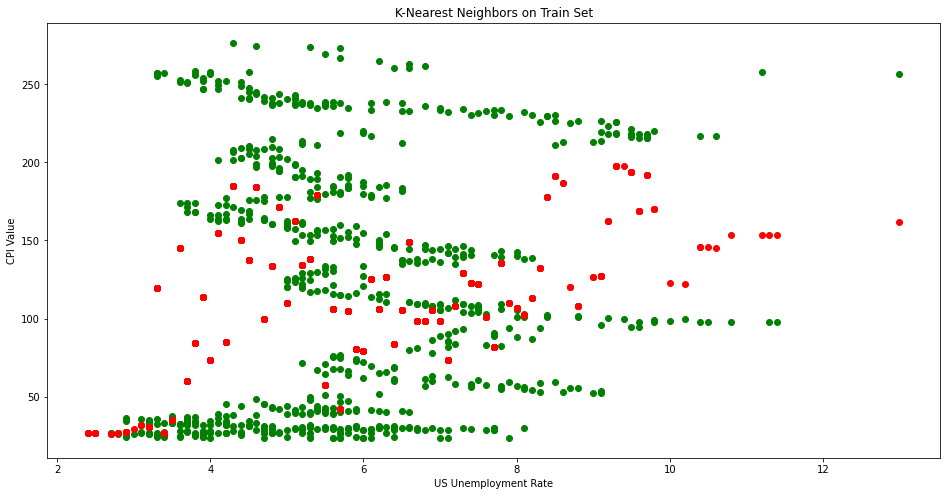

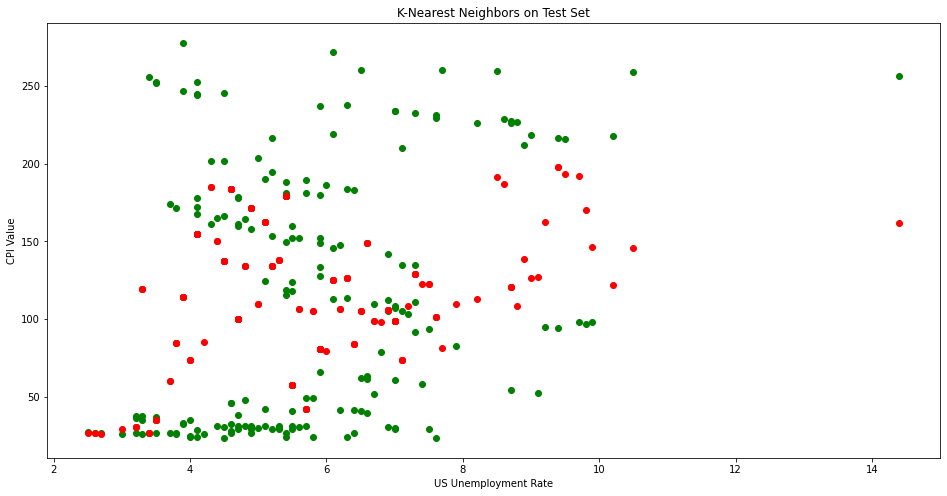

Coefficient of Determination on train set:  0.065
Coefficient of Determination on test set:  -0.172


In [ ]:
# Generate KNN model
unemp_score = knn_algorithm(unemp_data_clean, cpi_data_clean, 5, "US Unemployment Rate")

### KNN Model on Bitcoin data

In [ ]:
# Import predictor dataset
bitcoin_data_clean = pd.read_csv('cleaned_bitcoin.csv')

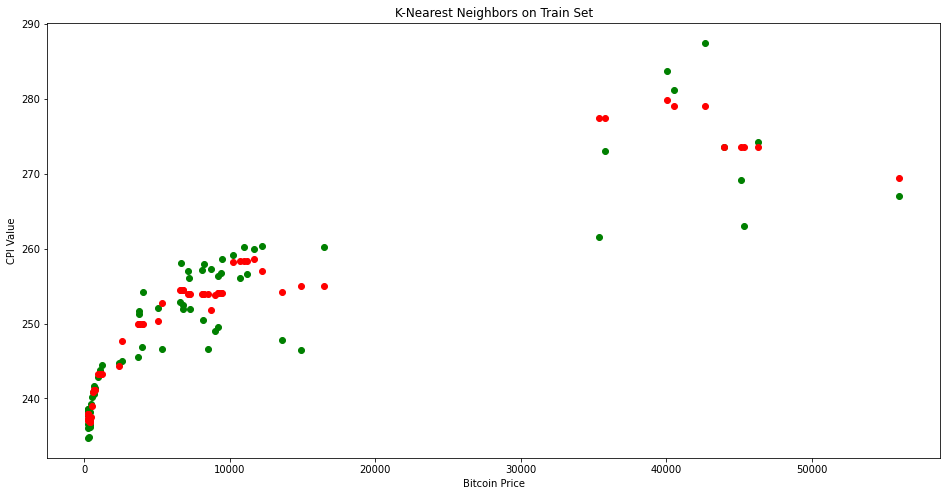

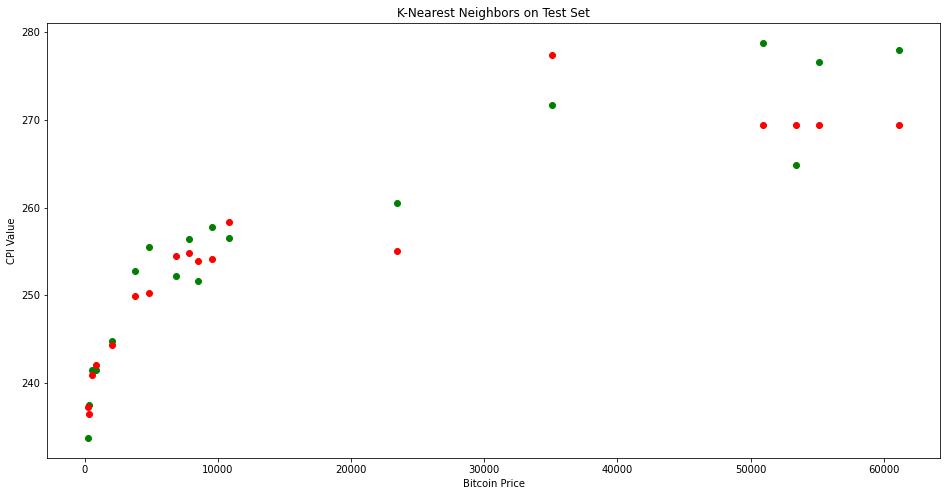

Coefficient of Determination on train set:  0.904
Coefficient of Determination on test set:  0.883


In [ ]:
# Generate KNN model
bitcoin_score = knn_algorithm(bitcoin_data_clean, cpi_data_clean, 5, "Bitcoin Price")

### KNN Model on CO2 levels data

In [ ]:
# Import predictor dataset
co2_data_clean = pd.read_csv('cleaned_co2.csv')

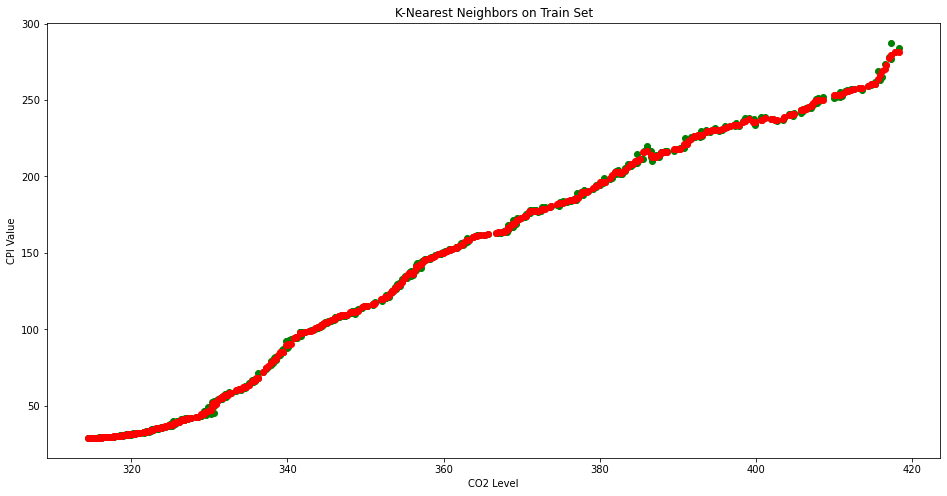

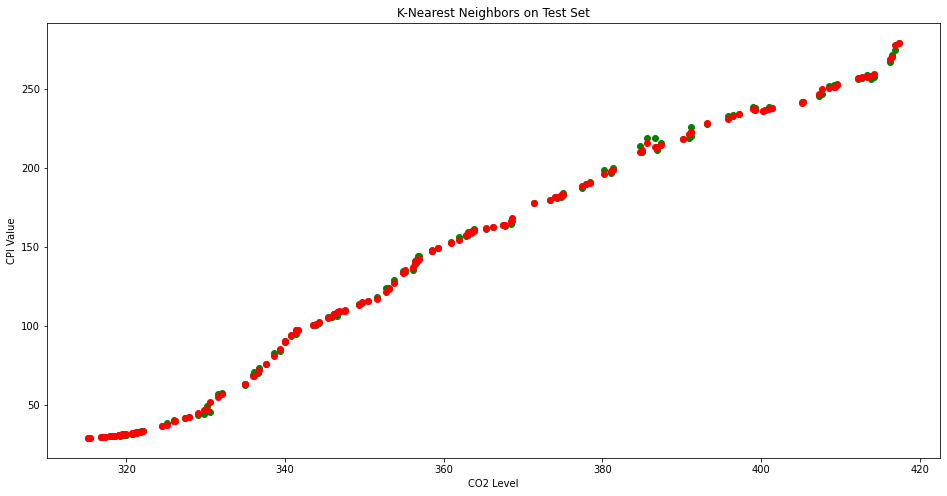

Coefficient of Determination on train set:  1.0
Coefficient of Determination on test set:  1.0


In [ ]:
# Generate KNN model
co2_score = knn_algorithm(co2_data_clean, cpi_data_clean, 5, "CO2 Level")

### KNN Model on Nominal Effective Exchange Rate (NEER) data

In [ ]:
# Import predictor dataset
neer_data_clean = pd.read_csv('cleaned_neer.csv')

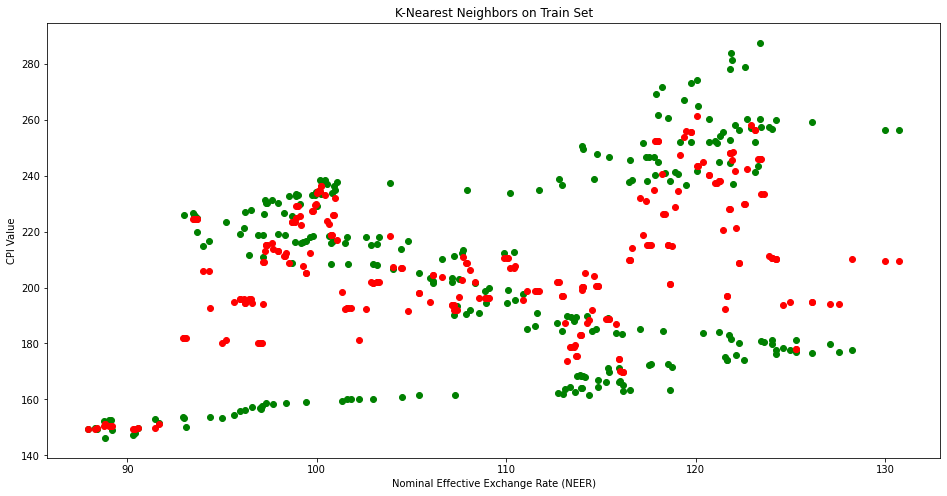

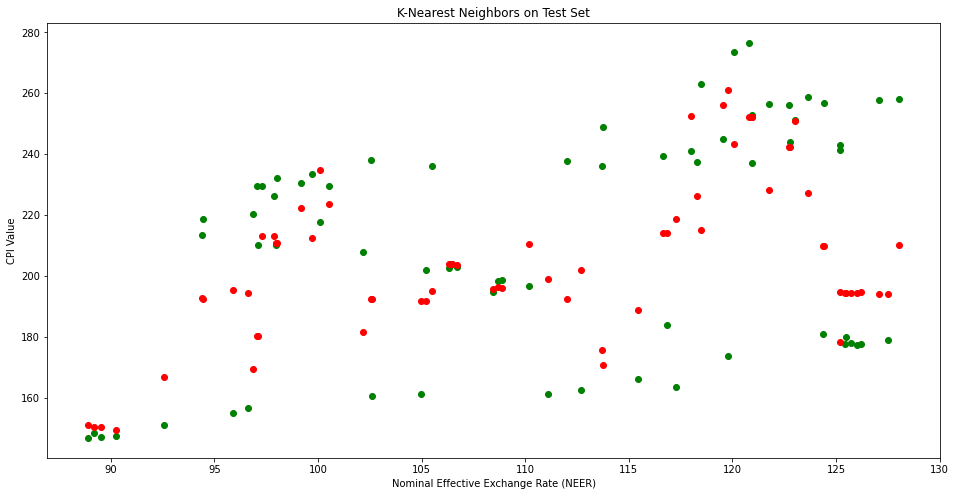

Coefficient of Determination on train set:  0.495
Coefficient of Determination on test set:  0.237


In [ ]:
# Generate KNN model
neer_score = knn_algorithm(neer_data_clean,cpi_data_clean,5,"Nominal Effective Exchange Rate (NEER)")

### KNN Model on oil price data

In [ ]:
# Import predictor dataset
oil_data_clean = pd.read_csv('cleaned_oil.csv')

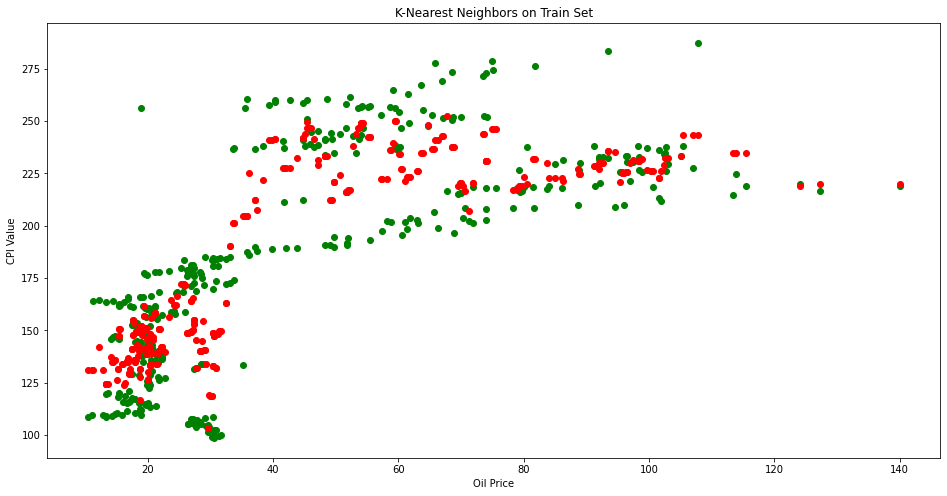

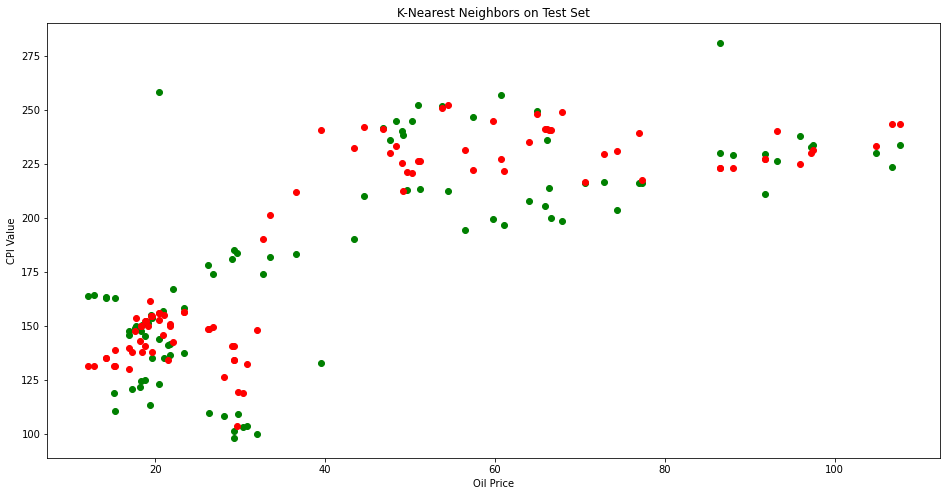

Coefficient of Determination on train set:  0.787
Coefficient of Determination on test set:  0.608


In [ ]:
# Generate KNN model
oil_score = knn_algorithm(oil_data_clean, cpi_data_clean, 5, "Oil Price")

### KNN Model on Producer Price Index (PPI) data

In [ ]:
# Import predictor dataset
ppi_data_clean = pd.read_csv('cleaned_ppi.csv')

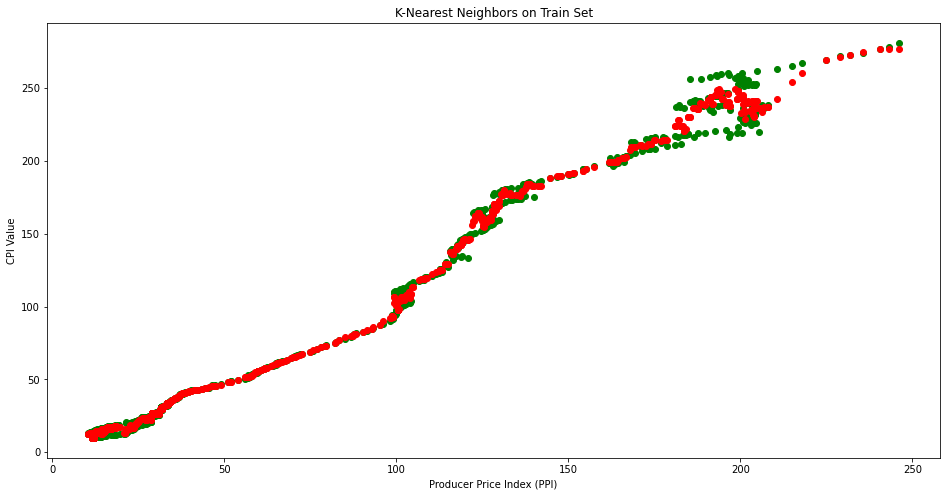

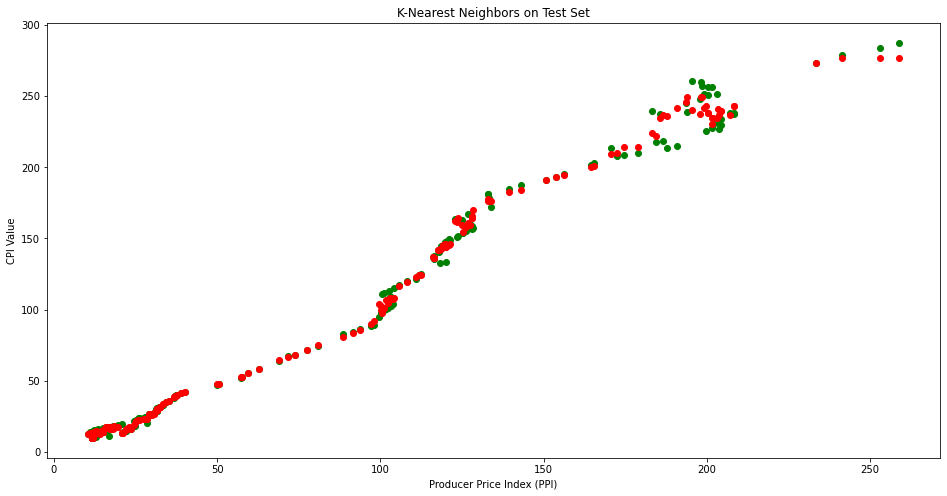

Coefficient of Determination on train set:  0.997
Coefficient of Determination on test set:  0.996


In [ ]:
# Generate KNN model
ppi_score = knn_algorithm(ppi_data_clean, cpi_data_clean, 5, "Producer Price Index (PPI)")

### KNN Model on lagged CPI data

In [ ]:
# Import predictor dataset
lcpi_data_clean = pd.read_csv('cleaned_lagged_cpi.csv')

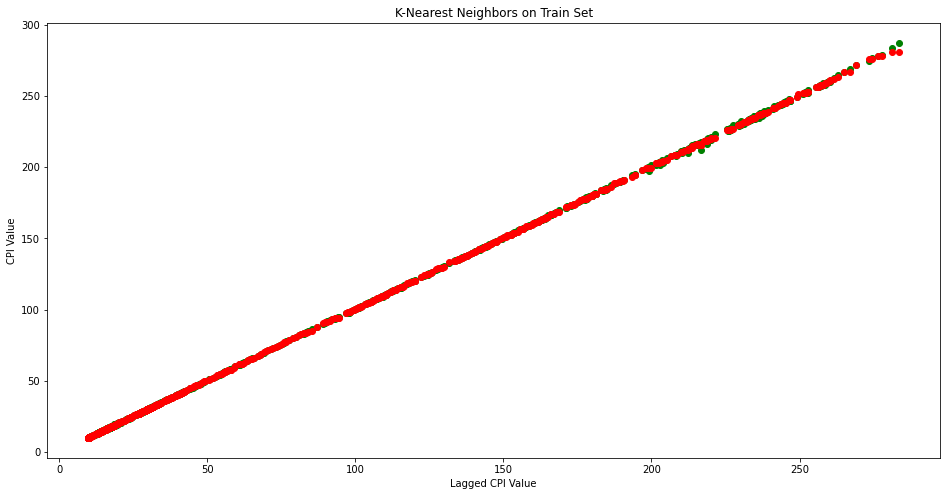

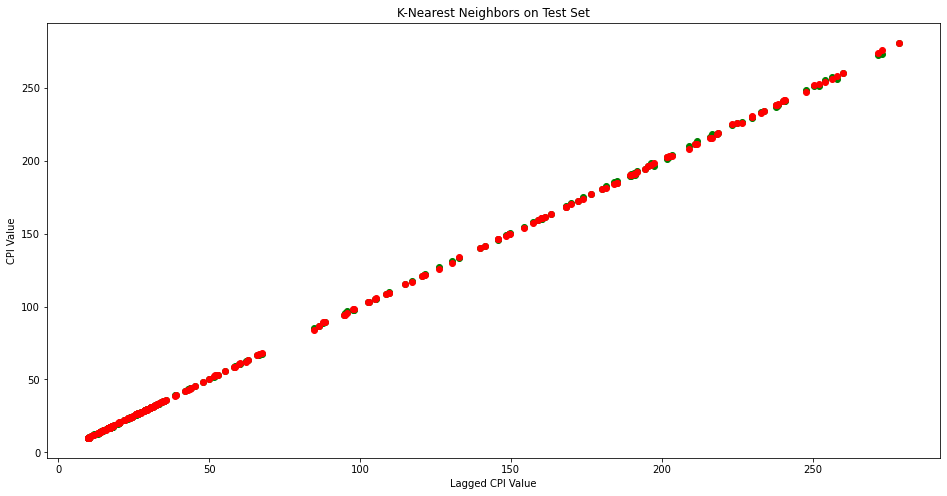

Coefficient of Determination on train set:  1.0
Coefficient of Determination on test set:  1.0


In [ ]:
# Generate KNN model
lcpi_score = knn_algorithm(lcpi_data_clean, cpi_data_clean, 5, "Lagged CPI Value")

### KNN Model on S&P 500 price data

In [ ]:
# Import predictor dataset
sp_data_clean = pd.read_csv('cleaned_sp.csv')

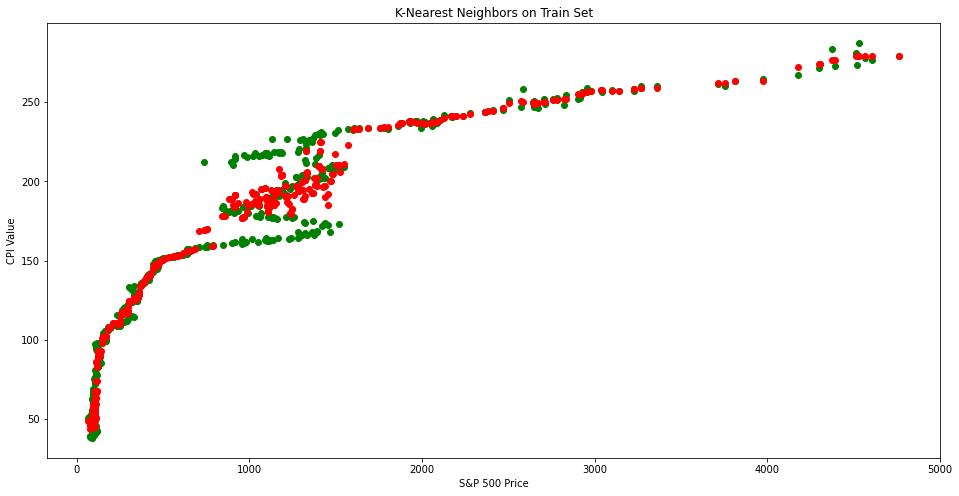

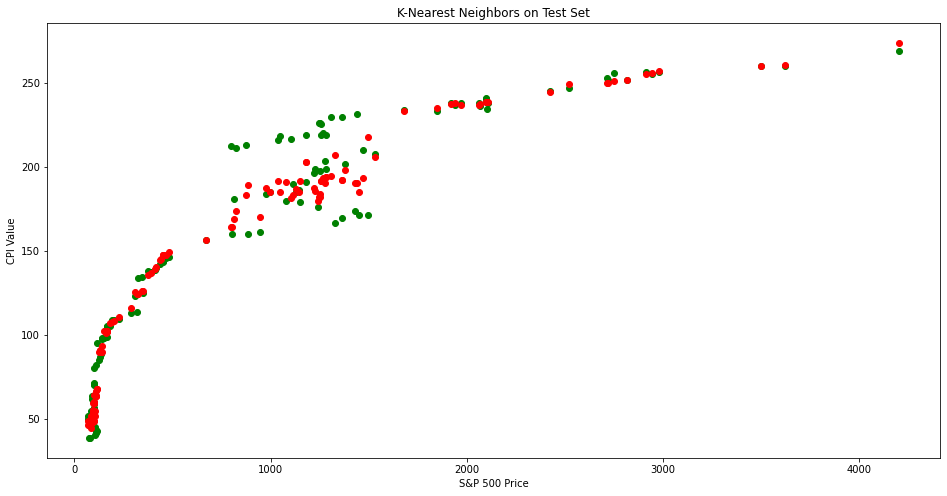

Coefficient of Determination on train set:  0.965
Coefficient of Determination on test set:  0.948


In [ ]:
# Generate KNN model
sp_score = knn_algorithm(sp_data_clean, cpi_data_clean, 5, "S&P 500 Price")

### Discussion

#### Coefficient of Determination

The coefficient of determination represents the percentage of data points which fall within the regression line predicted using a K-Nearest Neighbors model. Values typically range from 0 to 1, with 1 indicating the best possible accuracy for a model. Negative values can also be obtained when the model generated is a poor fit for the train data and does not accurately predict test set values.

In [ ]:
print("Coefficient of Determination on Test Data:")
print()
print("Inflation Expectations: ", bie_score)
print("US Unemployment Rate: ", unemp_score)
print("Bitcoin Price: ", bitcoin_score)
print("CO2 Levels: ", co2_score)
print("Nominal Effective Exchange Rate: ", neer_score)
print("Oil Price: ", oil_score)
print("Producer Price Index (PPI): ", ppi_score)
print("Lagged CPI: ", lcpi_score)
print("S&P 500: ", sp_score)

Coefficient of Determination on Test Data:

Inflation Expectations:  -0.155
US Unemployment Rate:  -0.172
Bitcoin Price:  0.883
CO2 Levels:  1.0
Nominal Effective Exchange Rate:  0.237
Oil Price:  0.608
Producer Price Index (PPI):  0.996
Lagged CPI:  1.0
S&P 500:  0.948


From the above results, we can conclude that factors such as CO2 levels, Lagged CPI, PPI, S&P 500, and Bitcoin price have a relatively high accuracy in predicting CPI values. The results obtained through a K-Nearest Neighbors analysis further supports results using other models such as Linear Regression and correlation values.  
  
  CO2 levels and Bitcoin have also been deemed as accurate indicators of CPI using a K-Nearest Neighbors model. Together with the results obtained using other models, this highlights the importance of considering these 'cool' factors in providing an accurate prediction of an inflationary environment.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=568b55e8-02e3-4ff2-aba8-e5ffce14598f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>